#### Import Libraries

In [31]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjust the configuration of the plots we will create

#### Import data

In [32]:
# Read data

df = pd.read_csv('/Users/yitingcheng/Downloads/movies.csv')

In [33]:
# View data

df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score      votes         director  \
0  June 13, 1980 (United States)    8.4   927000.0  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000.0   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000.0   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000.0     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000.0     Harold Ramis   

                    writer            star         country      budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000.0   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000.0   
2           Leigh Brackett     Mark Hamill   United States  18000000.0   
3             Jim Abrahams     Robert Hays   United States   3500000.0   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000.0   

         gross             company  runtime  
0   46998772.0        Warner Bros.    146.0  
1   58853106.0   Columbia Pictures    104.0  
2  538375067.0           Lucasfilm    124.0  
3   83453539.0  Paramount Pictures     88.0  
4   39846344.0      Orion Pictures     98.0

#### Data Cleaning

In [34]:
# Check missing values

df.isnull().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [35]:
# Check missing values (using loops to find missing values and present by percentage)

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, pct_missing))

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [36]:
# Drop null values

df.dropna(subset = ['released', 'writer', 'star', 'country', 'company'], inplace = True)

In [37]:
df.isnull().sum()

name           0
rating        70
genre          0
year           0
released       0
score          1
votes          1
director       0
writer         0
star           0
country        0
budget      2157
gross        181
company        0
runtime        2
dtype: int64

In [38]:
df.fillna(df.mean(), inplace=True)

/var/folders/ht/f0dqfwr17d10c_gmzy496cyc0000gn/T/ipykernel_8491/820435583.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  df.fillna(df.mean(), inplace=True)


In [39]:
df.isnull().sum()

name         0
rating      70
genre        0
year         0
released     0
score        0
votes        0
director     0
writer       0
star         0
country      0
budget       0
gross        0
company      0
runtime      0
dtype: int64

In [40]:
df.duplicated().sum()

0

In [41]:
# Data types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [42]:
# Convert datatypes

df['budget'] = pd.to_numeric(df['budget'], errors='coerce').astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').astype(int)
df['votes'] = pd.to_numeric(df['votes'], errors='coerce').astype(int)

In [43]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes         int64
director     object
writer       object
star         object
country      object
budget        int64
gross         int64
company      object
runtime     float64
dtype: object

In [44]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score    votes         director  \
0  June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  
0   46998772        Warner Bros.    146.0  
1   58853106   Columbia Pictures    104.0  
2  538375067           Lucasfilm    124.0  
3   83453539  Paramount Pictures     88.0  
4   39846344      Orion Pictures     98.0

In [45]:
df['yearcorrect'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [46]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score    votes         director  \
0  June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  yearcorrect  
0   46998772        Warner Bros.    146.0         1980  
1   58853106   Columbia Pictures    104.0         1980  
2  538375067           Lucasfilm    124.0         1980  
3   83453539  Paramount Pictures     88.0         1980  
4   39846344      Orion Pictures     98.0         1980

In [47]:
df.sort_values(by = ['gross'], inplace = False, ascending = False)

name     rating      genre  \
5445                                             Avatar      PG-13     Action   
7445                                  Avengers: Endgame      PG-13     Action   
3045                                            Titanic      PG-13      Drama   
6663         Star Wars: Episode VII - The Force Awakens      PG-13     Action   
7244                             Avengers: Infinity War      PG-13     Action   
7480                                      The Lion King         PG  Animation   
6653                                     Jurassic World      PG-13     Action   
6043                                       The Avengers      PG-13     Action   
6646                                          Furious 7      PG-13     Action   
7494                                          Frozen II         PG  Animation   
6644                            Avengers: Age of Ultron      PG-13     Action   
7247                                      Black Panther      PG-13     Action   
5845       Harry Potter and the Deathly Hallows: Part 2      PG-13  Adventure   
7075            Star Wars: Episode VIII - The Last Jedi      PG-13     Action   
7271                     Jurassic World: Fallen Kingdom      PG-13     Action   
6262                                             Frozen         PG  Animation   
7072                               Beauty and the Beast         PG     Family   
7281                                      Incredibles 2         PG  Animation   
7055                            The Fate of the Furious      PG-13     Action   
6244                                         Iron Man 3      PG-13     Action   
6688                                            Minions         PG  Animation   
6846                         Captain America: Civil War      PG-13     Action   
7250                                            Aquaman      PG-13     Action   
4245      The Lord of the Rings: The Return of the King      PG-13     Action   
7458                          Spider-Man: Far from Home      PG-13     Action   
7456                                     Captain Marvel      PG-13     Action   
5878                     Transformers: Dark of the Moon      PG-13     Action   
6059                                            Skyfall      PG-13     Action   
6494                    Transformers: Age of Extinction      PG-13     Action   
2448                                      The Lion King          G  Animation   
6047                              The Dark Knight Rises      PG-13     Action   
7463      Star Wars: Episode IX - The Rise of Skywalker      PG-13     Action   
7450                                              Joker          R      Crime   
7488                                        Toy Story 4          G  Animation   
5685                                        Toy Story 3          G  Animation   
4852         Pirates of the Caribbean: Dead Man's Chest      PG-13     Action   
6869                       Rogue One: A Star Wars Story      PG-13     Action   
7481                                            Aladdin         PG  Adventure   
5860        Pirates of the Caribbean: on Stranger Tides      PG-13     Action   
7140                                    Despicable Me 3         PG  Animation   
2245                                      Jurassic Park      PG-13     Action   
6908                                       Finding Dory         PG  Animation   
3451          Star Wars: Episode I - The Phantom Menace         PG     Action   
5667                                Alice in Wonderland         PG  Adventure   
6863                                           Zootopia         PG  Animation   
6045                  The Hobbit: An Unexpected Journey      PG-13  Adventure   
3843              Harry Potter and the Sorcerer's Stone         PG  Adventure   
5243                                    The Dark Knight      PG-13     Action   
5652       Harry Potter and the Deathly Hallows: Part 1      PG-13  Adventure   
6

In [48]:
# Display all the rows

# pd.set_option('display.max_rows', None)
# df.sort_values(by = ['gross'], inplace = False, ascending = False)

#### EDA

In [49]:
df.head()

name rating      genre  year  \
0                                     The Shining      R      Drama  1980   
1                                 The Blue Lagoon      R  Adventure  1980   
2  Star Wars: Episode V - The Empire Strikes Back     PG     Action  1980   
3                                       Airplane!     PG     Comedy  1980   
4                                      Caddyshack      R     Comedy  1980   

                        released  score    votes         director  \
0  June 13, 1980 (United States)    8.4   927000  Stanley Kubrick   
1   July 2, 1980 (United States)    5.8    65000   Randal Kleiser   
2  June 20, 1980 (United States)    8.7  1200000   Irvin Kershner   
3   July 2, 1980 (United States)    7.7   221000     Jim Abrahams   
4  July 25, 1980 (United States)    7.3   108000     Harold Ramis   

                    writer            star         country    budget  \
0             Stephen King  Jack Nicholson  United Kingdom  19000000   
1  Henry De Vere Stacpoole  Brooke Shields   United States   4500000   
2           Leigh Brackett     Mark Hamill   United States  18000000   
3             Jim Abrahams     Robert Hays   United States   3500000   
4       Brian Doyle-Murray     Chevy Chase   United States   6000000   

       gross             company  runtime  yearcorrect  
0   46998772        Warner Bros.    146.0         1980  
1   58853106   Columbia Pictures    104.0         1980  
2  538375067           Lucasfilm    124.0         1980  
3   83453539  Paramount Pictures     88.0         1980  
4   39846344      Orion Pictures     98.0         1980

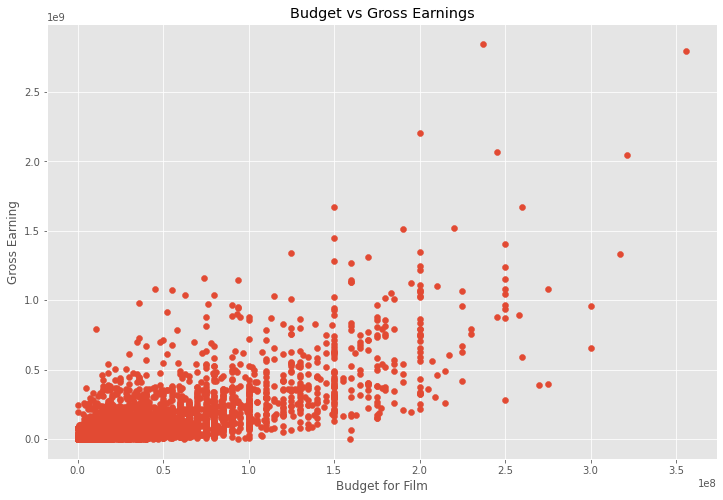

In [50]:
# Scatter plot with budget vs gross

plt.scatter(x = df['budget'], y = df['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget for Film')
plt.ylabel('Gross Earning')
plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

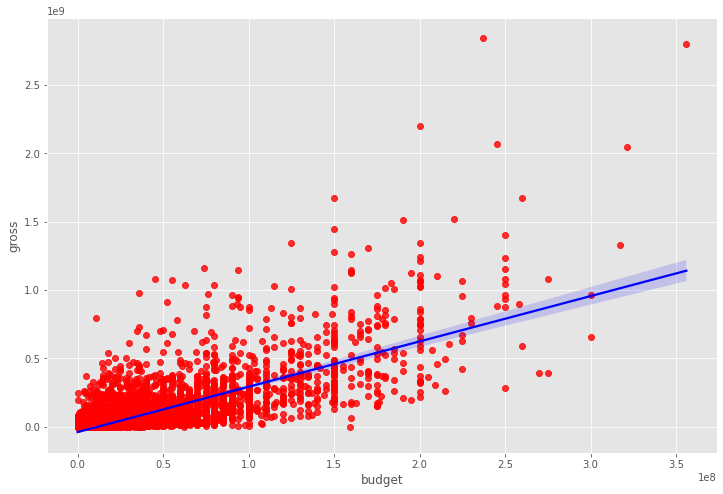

In [51]:
# Plot budget vs gross with seaborn (represents that budget and gross is highly correlated)

sns.regplot(x = 'budget', y = 'gross', data = df, 
            scatter_kws={"color": "red"}, line_kws={"color": "blue"})

In [52]:
# Correlation Types: Pearson(default), kendall, spearman

corr = df.corr()

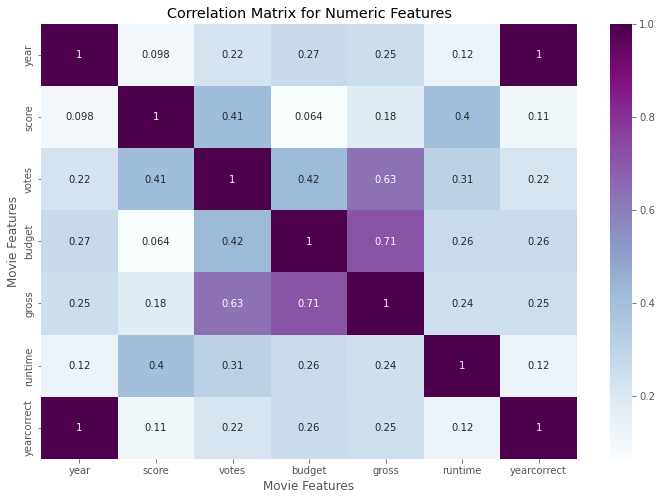

In [53]:
sns.heatmap(corr, annot = True, cmap = 'BuPu')
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [58]:
# Convert object to numeric values for correlation
# cat.codes = assign random number

df_numerized = df
for col_name in df_numerized.columns:
    if (df_numerized[col_name].dtype == 'object'):
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes
        
df_numerized.head()

name  rating  genre  year  released  score    votes  director  writer  \
0  6569       6      6  1980      1702    8.4   927000      2579    4002   
1  5558       6      1  1980      1489    5.8    65000      2262    1629   
2  5129       4      0  1980      1768    8.7  1200000      1109    2559   
3   285       4      4  1980      1489    7.7   221000      1297    1995   
4  1026       6      4  1980      1540    7.3   108000      1052     518   

   star  country    budget      gross  company  runtime  yearcorrect  
0  1041       54  19000000   46998772     2314    146.0         1980  
1   325       55   4500000   58853106      727    104.0         1980  
2  1737       55  18000000  538375067     1535    124.0         1980  
3  2238       55   3500000   83453539     1807     88.0         1980  
4   408       55   6000000   39846344     1772     98.0         1980

In [59]:
numerized_corr = df_numerized.corr()

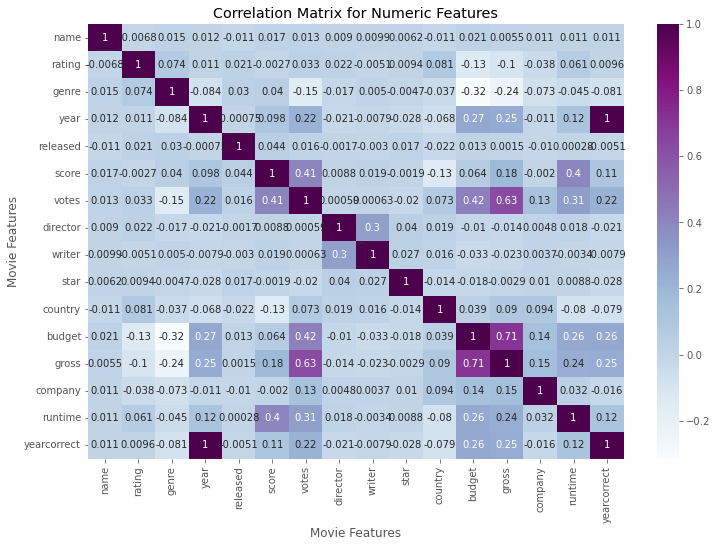

In [61]:
sns.heatmap(numerized_corr, annot = True, cmap = 'BuPu')
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()